<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [4]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [5]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [6]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [8]:
# new is the training set and t is the test set

In [9]:
tnew = t.drop(t[(t.over < 11.0) | (t.over >=16.0)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
id_test = tnew['id'].reset_index(drop = True)
id_test = id_test.to_frame().reset_index(drop=True)
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,11.1,6,9,1,0,0,76,3
1,9,6,9,1,11.2,6,9,1,0,0,77,3
2,9,6,9,1,11.3,6,9,1,0,0,78,3
3,9,6,9,1,11.4,6,9,1,0,0,79,3
4,9,6,9,1,11.5,6,9,1,0,0,79,3


In [10]:
xnew = new.drop(new[(new.over < 11.0) | (new.over >=16.0)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,11.1,9,5,1,0,0,102,1
1,5,9,5,1,11.2,9,5,1,0,0,108,1
2,5,9,5,1,11.3,9,5,1,0,0,110,1
3,5,9,5,1,11.4,9,5,1,0,0,111,1
4,5,9,5,1,11.5,9,5,1,0,0,111,1


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
history= model.fit(x=xnewt, y=y1train, epochs=150, 
          validation_data=(tnewt,y1test))

Epoch 1/150
1370/1370 [==============================] - 3s 2ms/step - loss: 3568.6169 - val_loss: 341.8773
Epoch 2/150
1370/1370 [==============================] - 2s 2ms/step - loss: 840.1063 - val_loss: 261.9681
Epoch 3/150
1370/1370 [==============================] - 2s 2ms/step - loss: 495.6203 - val_loss: 277.0202
Epoch 4/150
1370/1370 [==============================] - 2s 2ms/step - loss: 391.9189 - val_loss: 314.0294
Epoch 5/150
1370/1370 [==============================] - 2s 2ms/step - loss: 375.2319 - val_loss: 366.6543
Epoch 6/150
1370/1370 [==============================] - 2s 2ms/step - loss: 370.0882 - val_loss: 325.1637
Epoch 7/150
1370/1370 [==============================] - 2s 2ms/step - loss: 364.9467 - val_loss: 299.7802
Epoch 8/150
1370/1370 [==============================] - 2s 2ms/step - loss: 360.2913 - val_loss: 351.5995
Epoch 9/150
1370/1370 [==============================] - 2s 2ms/step - loss: 359.6968 - val_loss: 311.3534
Epoch 10/150
1370/1370 [============

In [16]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


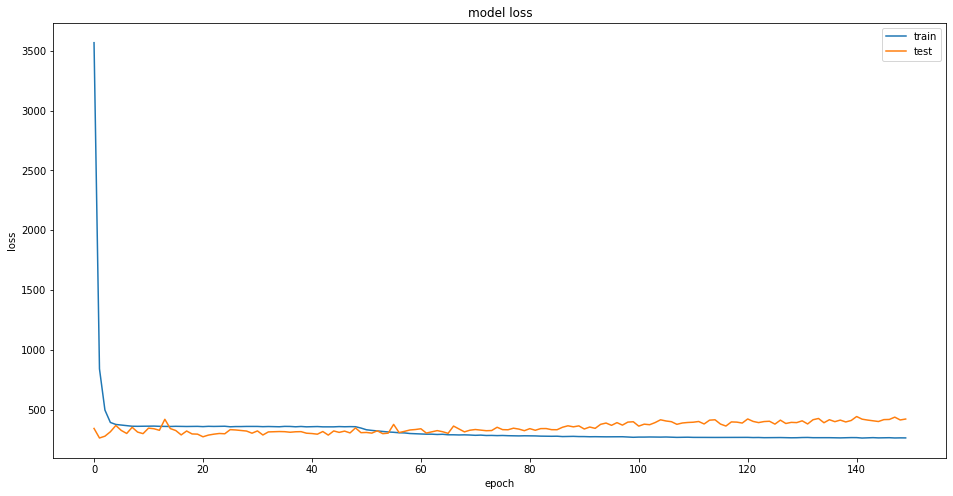

In [17]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [18]:
y1test = y1test.ravel()

In [19]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,153.204041,128
1,153.388962,128
2,153.399261,128
3,153.409592,128
4,153.367584,128
5,149.810257,128
6,149.030151,128
7,148.563431,128
8,148.096695,128
9,150.988785,128


In [20]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [21]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

36.21066433566433

In [22]:
# sample.to_csv('sample.csv')

In [23]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [24]:
# try1.shape[0]

In [25]:
# try1.sum()

In [26]:
# (try1.sum())/try1.shape[0]

In [27]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [28]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [29]:
# result

In [30]:
# res2 = result.values.reshape(1,2)

In [31]:
# res2

In [32]:
# res2.shape

In [33]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [34]:
ar1 = sample['Actual'].unique()

In [35]:
results = pd.DataFrame()

In [36]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [37]:
results.head()

,0,1
0,147.555743,128.0
0,144.971428,129.0
0,159.330719,156.0
0,150.713867,154.0
0,145.256510,126.0


In [38]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [39]:
results.reset_index(drop = True)

,Predict,Actual
0,147.555743,128.0
1,144.971428,129.0
2,159.330719,156.0
3,150.713867,154.0
4,145.256510,126.0
...,...,...
79,168.443665,190.0
80,121.545190,113.0
81,152.290008,172.0
82,156.152728,134.0


In [40]:
results.tail()

,Predict,Actual
0,168.443665,190.0
0,121.545190,113.0
0,152.290008,172.0
0,156.152728,134.0
0,159.372380,192.0


In [41]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

39.285714285714285


In [42]:
# results.info()

In [43]:
# results['Actual']

take epochs = 90 next time

In [44]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [97]:
sets = tests.drop(tests[(tests.over < 11.0) | (tests.over >=16.0)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
tt_2021 = tests['id'].reset_index(drop = True)
tt_2021 = tt_2021.to_frame().reset_index(drop = True)
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,11.1,12,5,1,0,0,95,2
1,12,5,5,1,11.2,12,5,1,0,0,95,2
2,12,5,5,1,11.3,12,5,1,0,0,96,2
3,12,5,5,1,11.4,12,5,1,0,0,96,2
4,12,5,5,1,11.5,12,5,1,0,0,97,2


In [98]:
yt1 = yt1.ravel()

In [47]:
xs = sc.fit_transform(sets)

In [48]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,163.393234,159
1,162.812805,159
2,162.853500,159
3,162.274231,159
4,162.314941,159
5,162.355637,159
6,160.126755,159
7,161.980179,159
8,162.020874,159
9,162.061569,159


In [49]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [50]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

42.857142857142854


In [88]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(13, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [89]:
win_pred = model.fit(x=xnewt, y=y2train, epochs=50, 
          validation_data=(tnewt,y2test))

Epoch 1/50
1370/1370 [==============================] - 3s 2ms/step - loss: 2.3397 - accuracy: 0.1664 - val_loss: 2.0359 - val_accuracy: 0.2319
Epoch 2/50
1370/1370 [==============================] - 2s 2ms/step - loss: 2.0943 - accuracy: 0.2211 - val_loss: 1.9344 - val_accuracy: 0.2928
Epoch 3/50
1370/1370 [==============================] - 2s 2ms/step - loss: 2.0239 - accuracy: 0.2402 - val_loss: 1.8810 - val_accuracy: 0.2959
Epoch 4/50
1370/1370 [==============================] - 2s 2ms/step - loss: 1.9728 - accuracy: 0.2566 - val_loss: 1.8439 - val_accuracy: 0.2673
Epoch 5/50
1370/1370 [==============================] - 2s 2ms/step - loss: 1.9316 - accuracy: 0.2762 - val_loss: 1.8245 - val_accuracy: 0.2710
Epoch 6/50
1370/1370 [==============================] - 2s 2ms/step - loss: 1.8926 - accuracy: 0.2869 - val_loss: 1.8024 - val_accuracy: 0.2692
Epoch 7/50
1370/1370 [==============================] - 2s 2ms/step - loss: 1.8557 - accuracy: 0.3011 - val_loss: 1.7483 - val_accuracy:

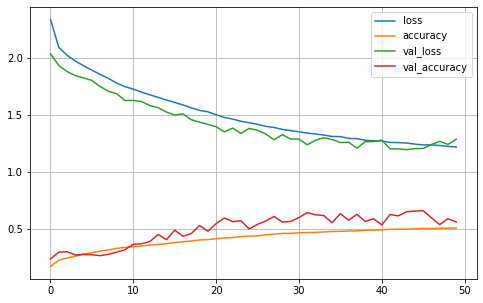

In [90]:
pd.DataFrame(win_pred.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

In [91]:
y2test = y2test.ravel()

In [92]:
predictions = model.predict(tnewt)
class_pred = np.argmax(predictions, axis=1)
class_pred
# sample = pd.DataFrame(predictions,columns=['Predict'])
# sample['Actual']=y2test
# sample.head(10)

array([ 9,  9,  9, ..., 11, 11, 11])

In [93]:
# predictions

In [94]:
# proba = predictions.round(2)
# proba

In [95]:
sample = pd.DataFrame(class_pred,columns=['Predict'])
sample['Actual']=y2test
# sample.head()

In [96]:
frames = [id_test, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

56.00000000000001


In [ ]:
# final.to_csv('final.csv')

In [99]:
test_pred = model.predict(xs)
class_pred = np.argmax(test_pred, axis=1)
sample = pd.DataFrame(class_pred,columns=['Predict'])
yt2 = yt2.ravel()
sample['Actual']=yt2

In [100]:
frames = [tt_2021, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

95.23809523809523
